In [503]:
#importing necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [504]:
sns.set_style('darkgrid')  
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']= (9,5)
plt.rcParams['figure.facecolor']= '#FFE5B4'

In [505]:
happy_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [506]:
happy_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [507]:
happy_df.columns #checking all the columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# EDA

In [508]:
happy_df.dtypes #checking data types

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

## Checking Null values 

In [509]:
happy_df.isnull().sum() #checking null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing data in the dataset

In [510]:
happy_df.shape

(158, 12)

In [511]:
happy_df.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

The data has 155 rows and 12 columns, No missing values

In [518]:
happy_df.duplicated() #checking duplicate values in the dataset

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

There are no duplicate values in the dataset

In [514]:
happy_df.duplicated().sum()

0

In [569]:
happy_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

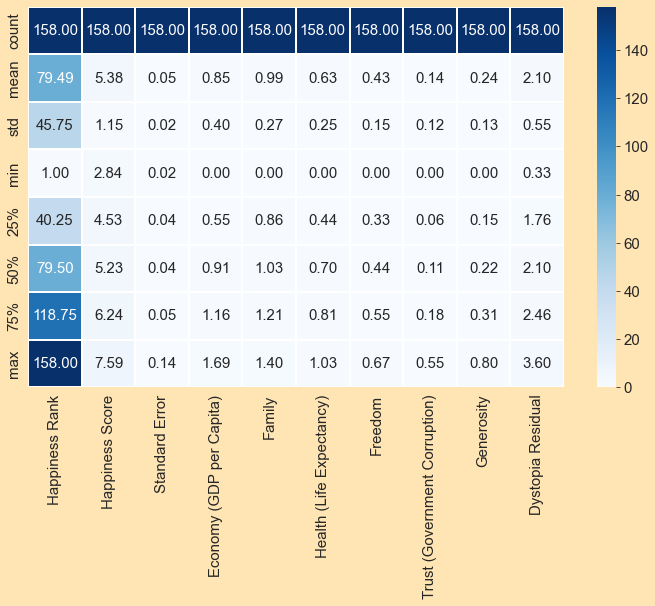

In [570]:
plt.figure(figsize=(12,7))
sns.heatmap(happy_df.describe(),annot = True,linewidth=0.1,cmap='Blues',fmt='0.2f')

In [531]:
happy_df.shape

(158, 12)

In [24]:
happy_df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Generally there are some negative correlations in the data.
1. Happiness score column (target variable) is higly correlated with GDP per capita, family and Life expectancy 
2. However family, Life expectancy and GDP per capita are also highly correlated with each other, expecially with GDP per capita and Life Expectancy, further investigation will be done to drop one of these columns

<AxesSubplot:>

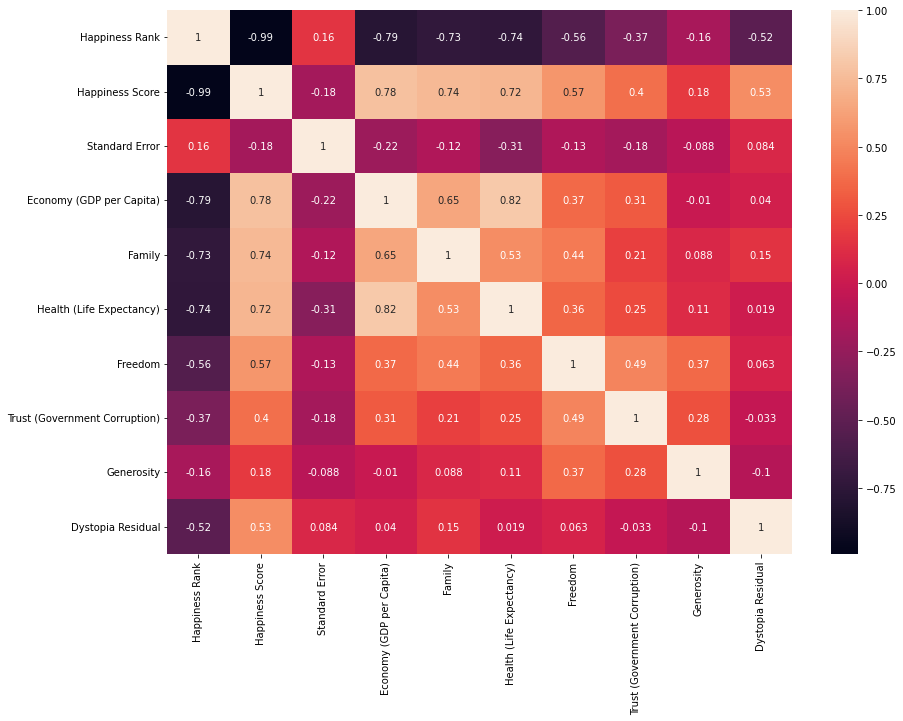

In [25]:
ax = plt.subplots(figsize=(14,10))
sns.heatmap(happy_df.corr(), annot= True)

# Bivariate Analysis
## Normal Distribution curves

<AxesSubplot:title={'center':'Box plot of happiness Rank'}, xlabel='Happiness Rank'>

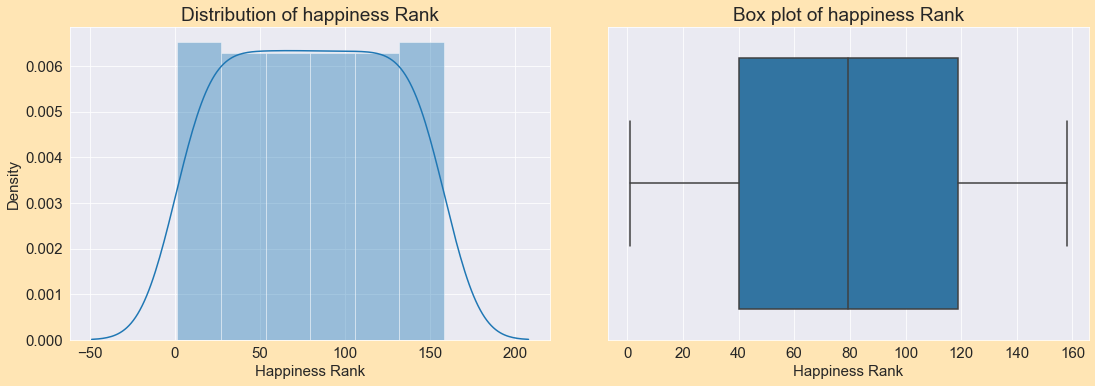

In [548]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution of happiness Rank', fontsize = 19)
sns.distplot(happy_df['Happiness Rank'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of happiness Rank', fontsize = 19)
sns.boxplot(happy_df['Happiness Rank'], ax = axes[1])


Happiness Rank feature has a min value of 0 and maximum value 150 the data is not normally distributed has no outliers in the data

<AxesSubplot:title={'center':'Box plot of Happiness Score'}, xlabel='Happiness Score'>

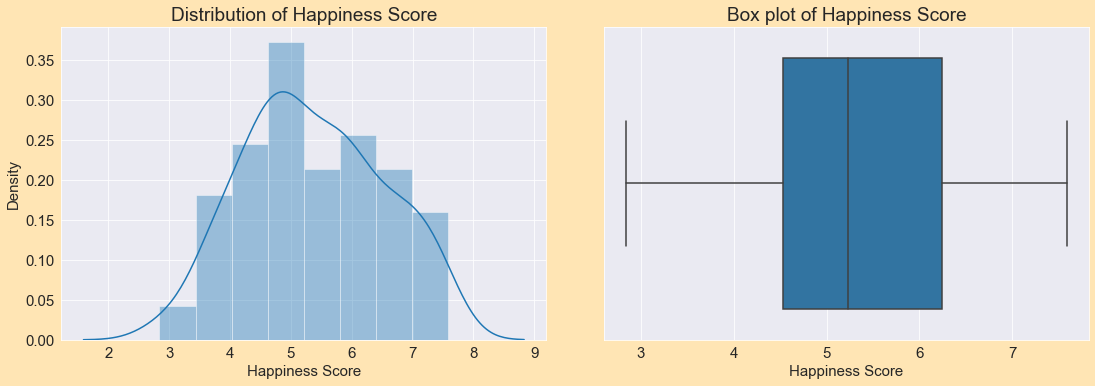

In [553]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution of Happiness Score', fontsize = 19)
sns.distplot(happy_df['Happiness Score'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Happiness Score', fontsize = 19)
sns.boxplot(happy_df['Happiness Score'], ax = axes[1])

Happiness score is also not normally distributed however there is no outliers found, has a minimum value of 2.8 and a maximum value of 7.5

<AxesSubplot:title={'center':'Box plot of Standard Error'}, xlabel='Standard Error'>

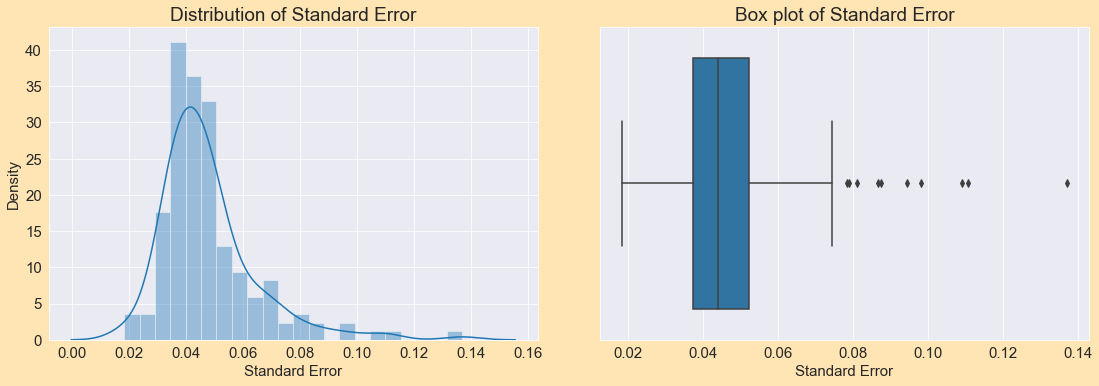

In [552]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution of Standard Error', fontsize = 19)
sns.distplot(happy_df['Standard Error'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Standard Error', fontsize = 19)
sns.boxplot(happy_df['Standard Error'], ax = axes[1])


Standard error is also not normally distributed but has some outliers, it has a minimum and maximum value of 0.0 and 0.14 respectively

<AxesSubplot:title={'center':'Box plot of GDP'}, xlabel='Economy (GDP per Capita)'>

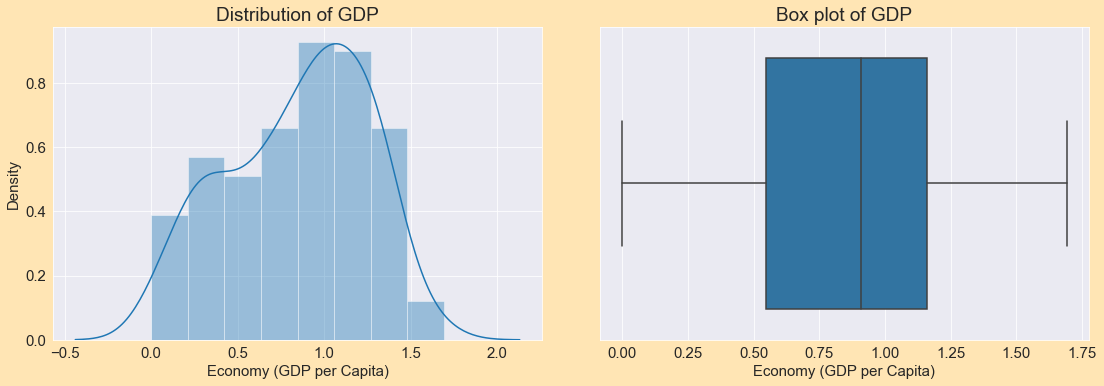

In [554]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution of GDP', fontsize = 19)
sns.distplot(happy_df['Economy (GDP per Capita)'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of GDP', fontsize = 19)
sns.boxplot(happy_df['Economy (GDP per Capita)'], ax = axes[1])


GDP has no outliers, also not normally distributed with a maximum and minimum value of 1.6 and 0 respectively

<AxesSubplot:title={'center':'Box plot of Family'}, xlabel='Family'>

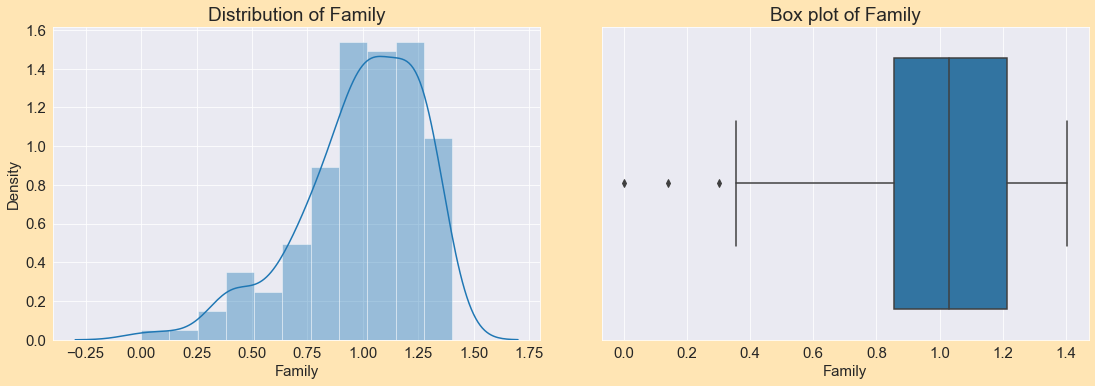

In [555]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution of Family', fontsize = 19)
sns.distplot(happy_df['Family'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Family', fontsize = 19)
sns.boxplot(happy_df['Family'], ax = axes[1])


The distribution of family is also skewed and not normally distributed with few outliers, a minimum value of 0 and maximum value 1.26

<AxesSubplot:title={'center':'Box plot of Life Expectancy'}, xlabel='Health (Life Expectancy)'>

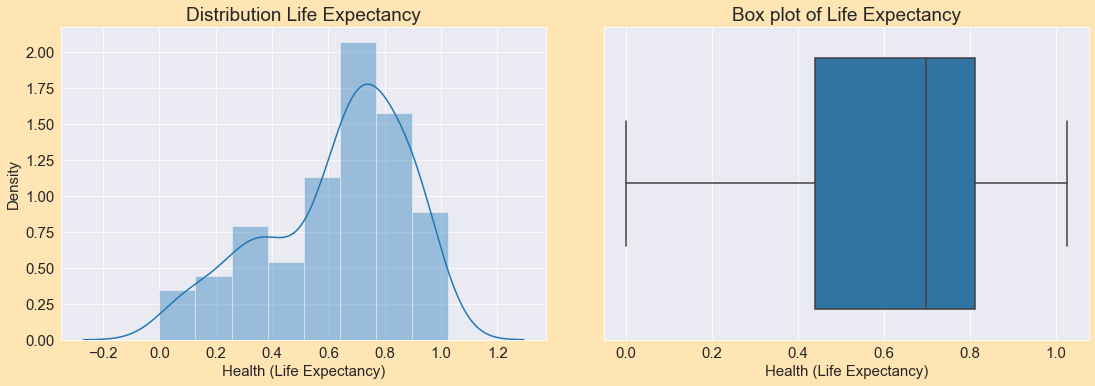

In [556]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution Life Expectancy', fontsize = 19)
sns.distplot(happy_df['Health (Life Expectancy)'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Life Expectancy', fontsize = 19)
sns.boxplot(happy_df['Health (Life Expectancy)'], ax = axes[1])


<AxesSubplot:title={'center':'Box plot of Freedom'}, xlabel='Freedom'>

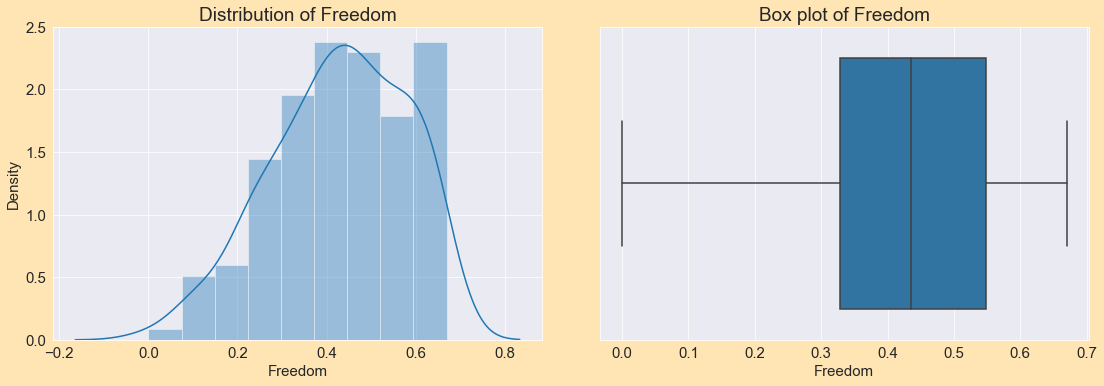

In [557]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution of Freedom', fontsize = 19)
sns.distplot(happy_df['Freedom'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Freedom', fontsize = 19)
sns.boxplot(happy_df['Freedom'], ax = axes[1])


Freedom variable has a minimum value of 0 and maximum value 0.69, no outliers and it is skewed

<AxesSubplot:title={'center':'Box plot of Corruption'}, xlabel='Trust (Government Corruption)'>

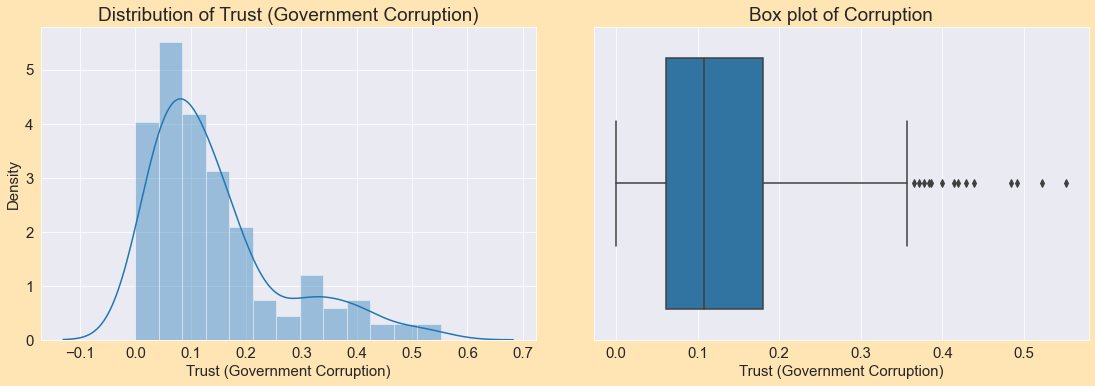

In [558]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution of Trust (Government Corruption)', fontsize = 19)
sns.distplot(happy_df['Trust (Government Corruption)'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Corruption', fontsize = 19)
sns.boxplot(happy_df['Trust (Government Corruption)'], ax = axes[1])


Corruption columns is also not normally distributed with many outliers, the minimum value of 0 and maximum 0.54

<AxesSubplot:title={'center':'Box plot of Generosity'}, xlabel='Generosity'>

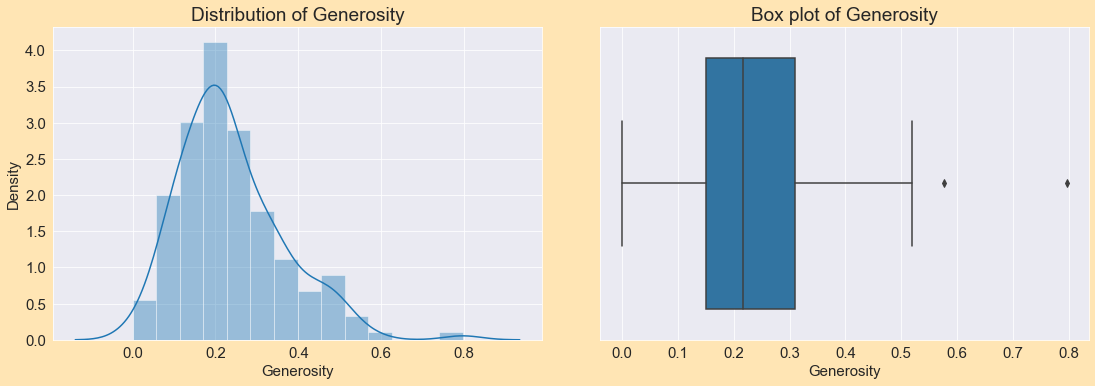

In [559]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution of Generosity', fontsize = 19)
sns.distplot(happy_df['Generosity'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Generosity', fontsize = 19)
sns.boxplot(happy_df['Generosity'], ax = axes[1])


Generosity also has a few outliers also its is clearly not normally distributed and a mimum value of 0 and maximum 0.8

<AxesSubplot:title={'center':'Box plot of Dystopia'}, xlabel='Dystopia Residual'>

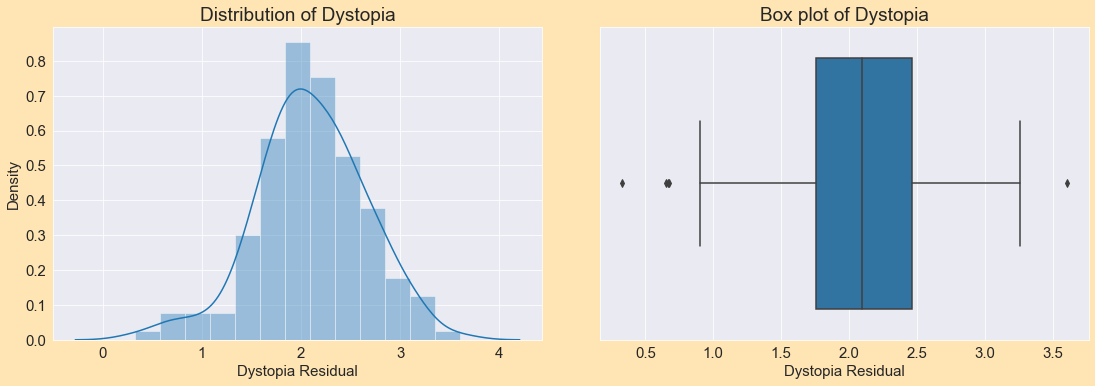

In [561]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Distribution of Dystopia', fontsize = 19)
sns.distplot(happy_df['Dystopia Residual'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Dystopia', fontsize = 19)
sns.boxplot(happy_df['Dystopia Residual'], ax = axes[1])


Dystopia Residual looks almost normal but it is skewed and not normally distributed, also box plot show some few outliers 

### Summary of Bivariate Analysis
1. Family, Dystopia Residual, Generosity, corruption and Standard error apears to have some outliers
2. All the features are skewed and not normally distributed
3. Happines Rank, GDP per capita, Freedom, Happiness Score and Life Expectancy do not have outliers

# Bivariate Analysis

### GDP per Capita and Region

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

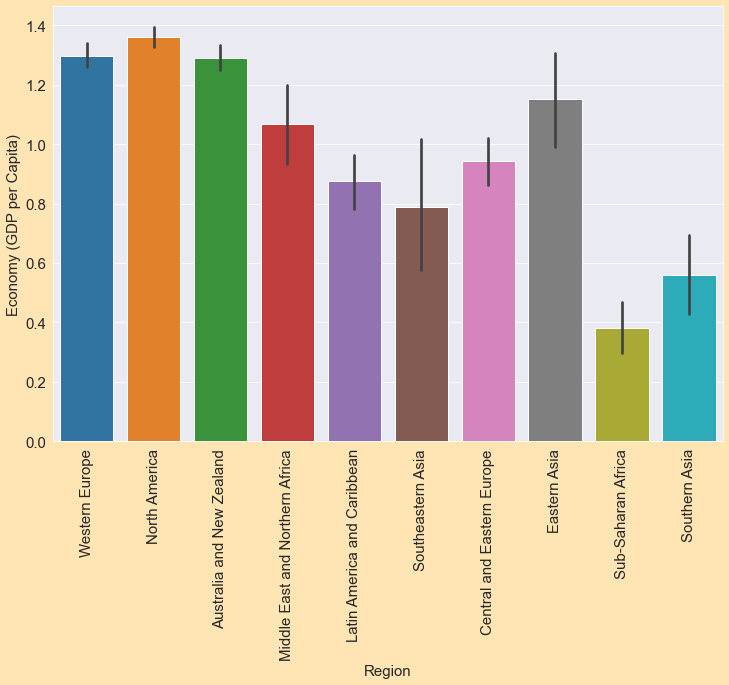

In [152]:
plt.rcParams['figure.figsize']=(12,8)
sns.barplot(x = 'Region',y='Economy (GDP per Capita)',data = happy_df)
plt.xticks(rotation=90)

Countries in North America has the highest GDP per capita, and Countries in sub-saharan Africa with the lowerest GDP, clearly the differce is quite significant but not so much with the top three regions with high GDP

Text(0, 0.5, 'GDP')

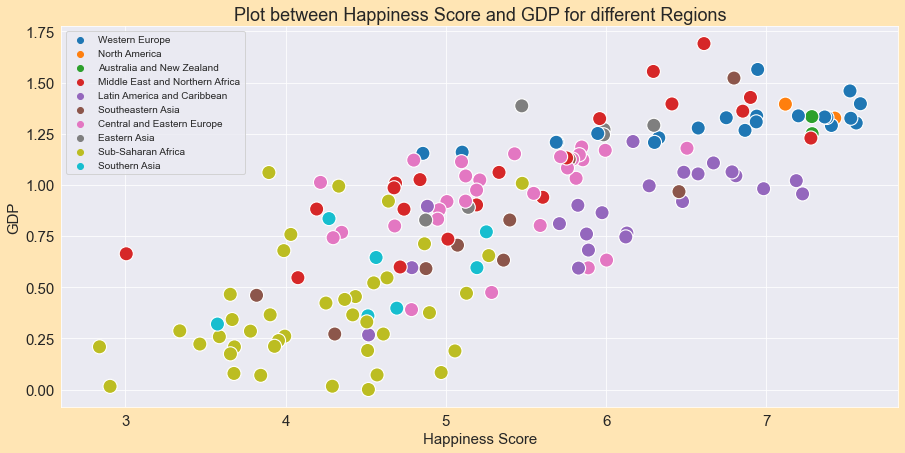

In [399]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Score and GDP for different Regions')
sns.scatterplot(x ='Happiness Score', y= 'Economy (GDP per Capita)',hue = happy_df.Region, data =happy_df, s = 200)

plt.legend(loc='upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP')

Countries form western Europe have the higest happiness score as well as highest GDP followed by countries in North America.  Sub-saharan Africa has the lowest happiness score and GDP as well. 

### Country and Region

In [68]:
# total countries in each region

total_country = happy_df.groupby('Region')[['Country']].count()
total_country

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

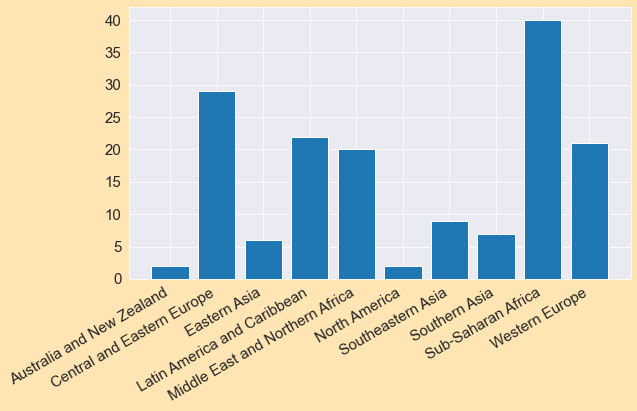

In [565]:
plt.bar(total_country.index, total_country['Country'])
plt.xticks(rotation = 30, ha='right')

### Region and Government Trust

In [400]:
# corruption in regions

corruption = happy_df.groupby('Region')[['Trust (Government Corruption)']].mean()
corruption

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


Australia and New Zealand has the highest average corruption and countries in central and Eastern Europe with lowerest average corruption

<BarContainer object of 10 artists>

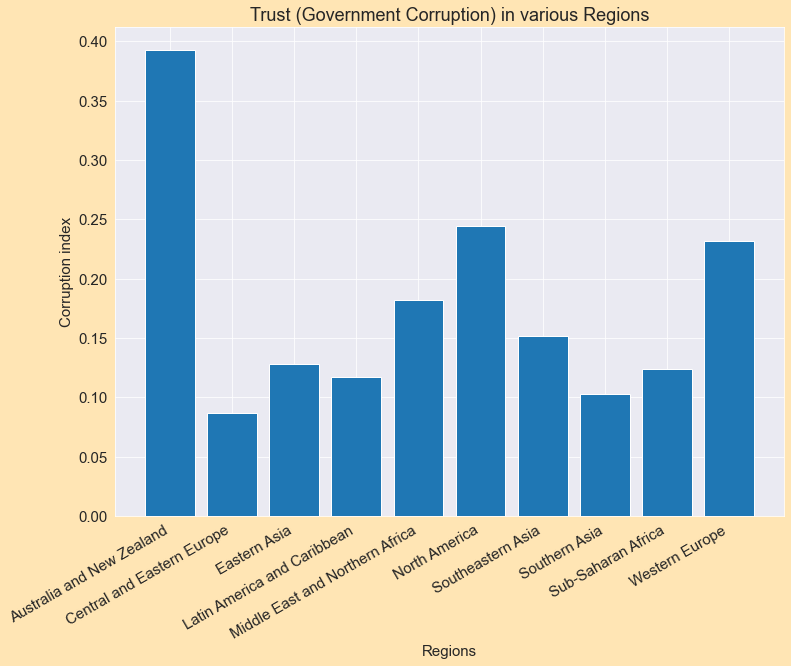

In [146]:
plt.rcParams['figure.figsize']=(12,9)
plt.title('Trust (Government Corruption) in various Regions', fontsize = 18)
plt.xlabel('Regions',fontsize = 15)
plt.ylabel('Corruption index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption['Trust (Government Corruption)'])

This plots shows clear representation of corruption list, Austrialia and New Zealand has the highest corruption and the difference with the others is quiet significant, Central and Easten Europe as well as southern Asia has the least corruption index

### Top ten and bottom ten happiest Countries Life Expectancies

In [88]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

<AxesSubplot:title={'center':'Bottom 10 least happpy countries Life Expectancy'}, xlabel='Country', ylabel='Health (Life Expectancy)'>

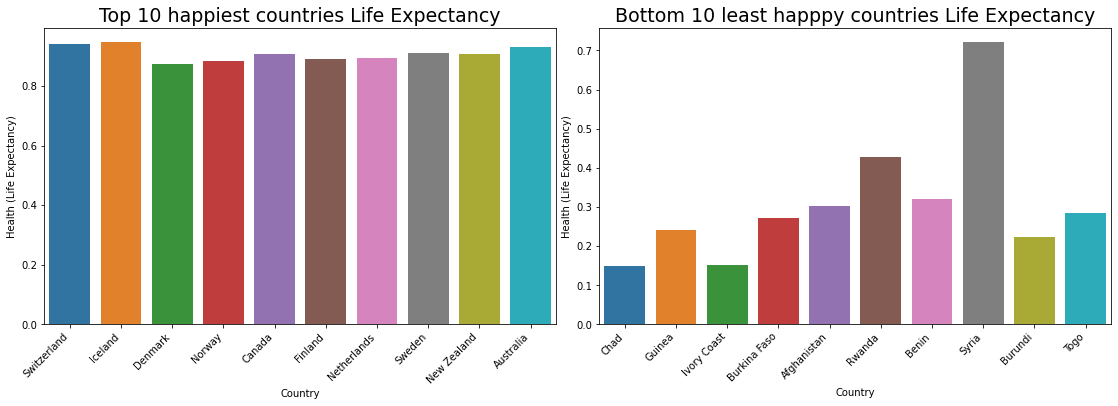

In [125]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad=2)
xlabels= top_10['Country']
axes[0].set_title('Top 10 happiest countries Life Expectancy',fontsize=19)
axes[0].set_xticklabels(xlabels, rotation = 45, ha='right')
sns.barplot(x=top_10['Country'], y= top_10['Health (Life Expectancy)'], ax = axes[0])

plt.tight_layout(pad=2)
xlabels= bottom_10['Country']
axes[1].set_title('Bottom 10 least happpy countries Life Expectancy',fontsize=19)
axes[1].set_xticklabels(xlabels, rotation = 45, ha='right')
sns.barplot(x=bottom_10['Country'], y= bottom_10['Health (Life Expectancy)'])


On an the average the top ten life expectancies are 80 years, whiles the least happy countries has less than 50 for  most of the countries, Syria is found at the bottom 10 but have a very high life expectancy, this could be an outlier.

### Happiness score and freedom

Text(0, 0.5, 'happiness Score')

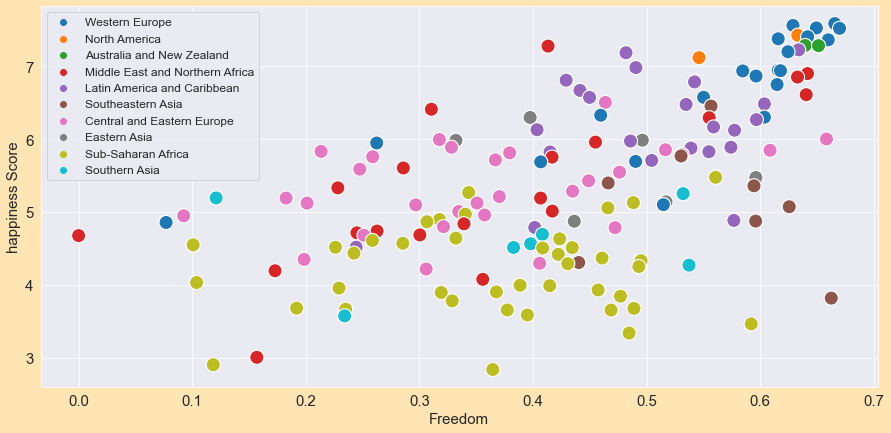

In [150]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = happy_df['Freedom'], y=happy_df['Happiness Score'],hue=happy_df['Region'],s = 200)
plt.legend(loc = 'upper left', fontsize = 12)
plt.xlabel('Freedom')
plt.ylabel('happiness Score')

Countries in sub saharan Africa seems to have a low happiness score compared with other countries from other regions, an interesting observation is countries in the middle east about how they are spreaded with some countries having high freedom and highes happiness socore, Austrialia and New Zealand have a very high freedom and high happiness score 

### correlations of all features with target column

In [139]:
happy_df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

Text(0.5, 1.0, 'Correlation')

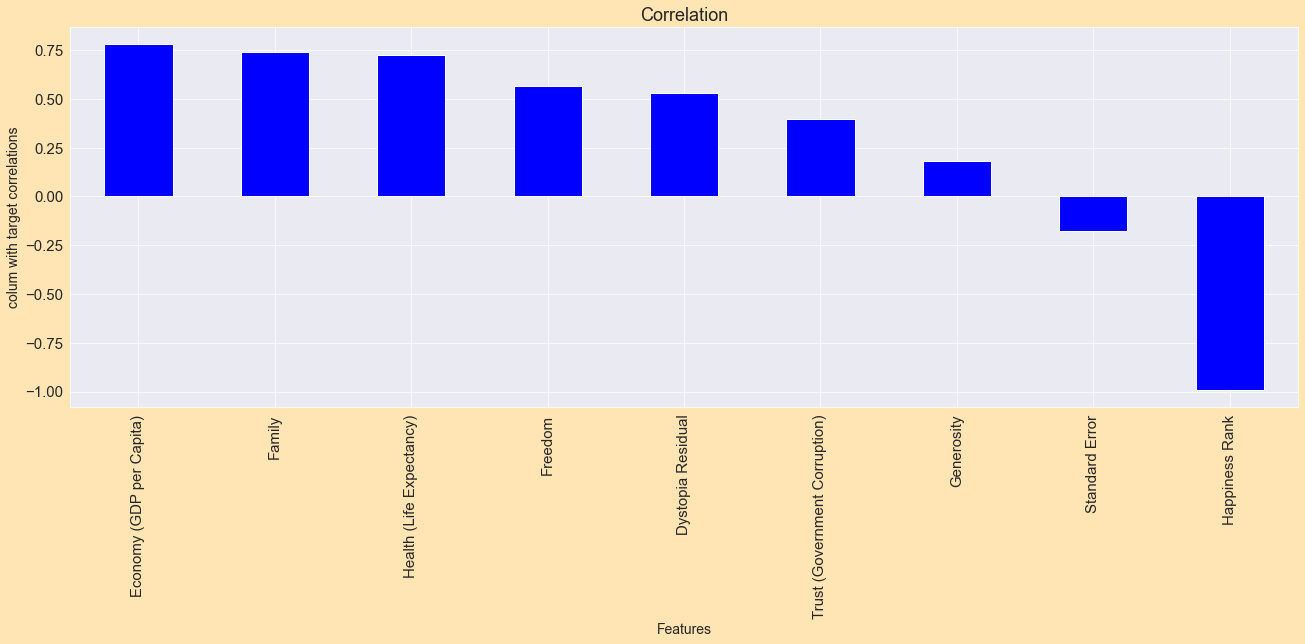

In [151]:
plt.rcParams['figure.figsize']=(22,7)
happy_df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color ='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('colum with target correlations', fontsize = 14)
plt.title('Correlation', fontsize= 18)

### Investigating the relationship between happiness score and Generosity

<AxesSubplot:title={'center':'Happiness Score vs Generosity'}, xlabel='Generosity', ylabel='Happiness Score'>

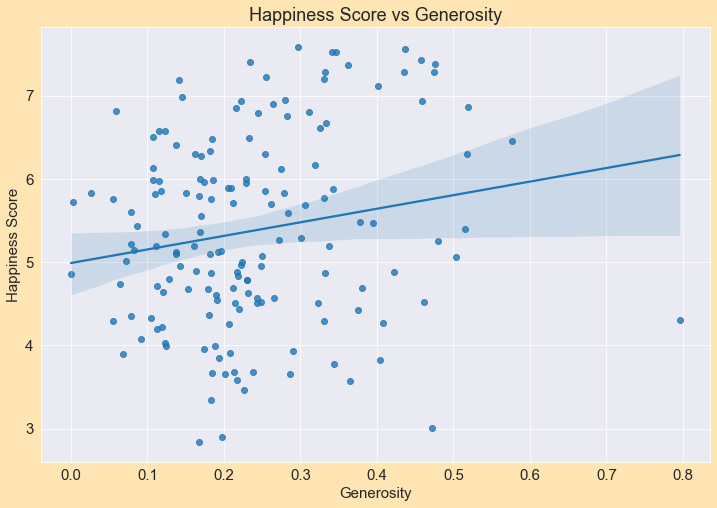

In [161]:
plt.title("Happiness Score vs Generosity")
sns.regplot(data=happy_df, x='Generosity', y='Happiness Score')

Generosity does not have any effect on Happiness score, they are highly uncorrelated we will consider dropping Generosity column during machine learning modeling

### Multivariate Analysis

### Checking relationship and  distributions of each columns

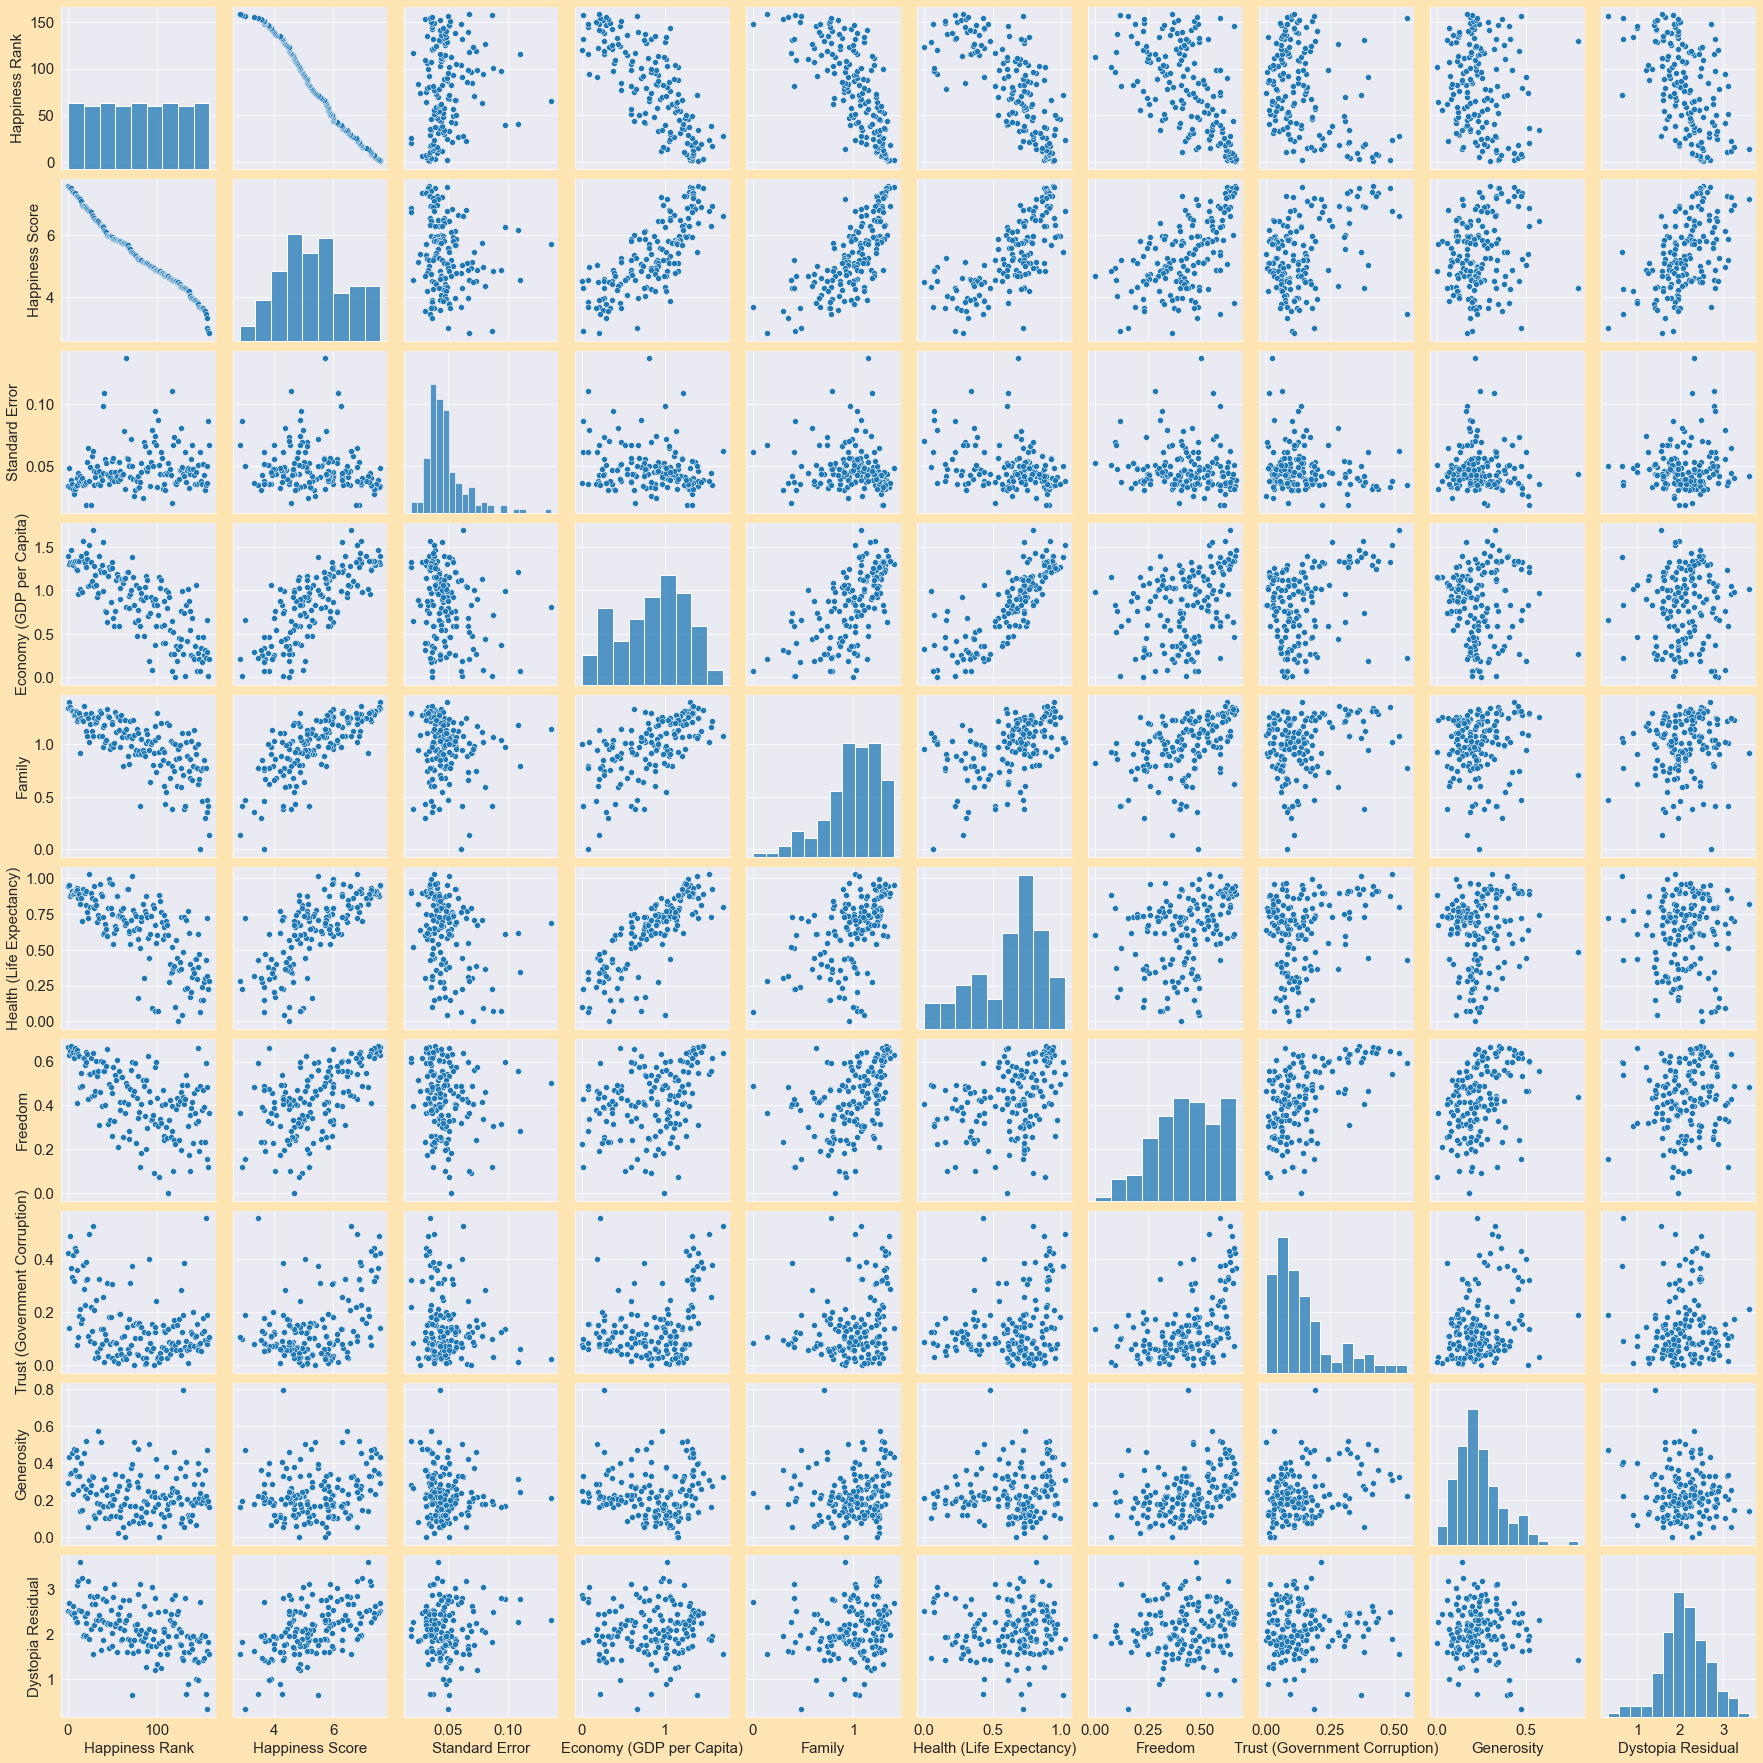

In [571]:
sns.pairplot(happy_df)

## Observations
1. All the feature variables are skewed and not normally distributed
2. GDP and life expectancy is highly correlated with each other
3. Happiness rank is negatively correlated with all the variables
3. GDP is highly related with happiness score and seem to be a very important feature to determine happiness of a country
4. Generosity has a very weak ralationship with the happiness score

# Skewness Check

In [142]:
happy_df.skew() #checking the skewness of the dataset

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Threshold of skewness taken is +/-0.5, Columns which have skewness:

### Encoding the Region column in the dataset

In [239]:
for col in happy_df.columns: ##checking the number of labels in each column
    print(col,":",len(happy_df[col].unique()),'labels')

Country : 158 labels
Region : 10 labels
Happiness Rank : 157 labels
Happiness Score : 157 labels
Standard Error : 153 labels
Economy (GDP per Capita) : 158 labels
Family : 158 labels
Health (Life Expectancy) : 157 labels
Freedom : 158 labels
Trust (Government Corruption) : 157 labels
Generosity : 158 labels
Dystopia Residual : 158 labels


In [401]:
lb = LabelEncoder()
happy_df['Region']= lb.fit_transform(happy_df['Region'])
happy_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [355]:
happy_df.shape

(158, 12)

In [403]:
happy_df= happy_df.drop(['Country','Generosity','Family','Standard Error'], axis=1)
happy_df

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,9,1,7.587,1.39651,0.94143,0.66557,0.41978,2.51738
1,9,2,7.561,1.30232,0.94784,0.62877,0.14145,2.70201
2,9,3,7.527,1.32548,0.87464,0.64938,0.48357,2.49204
3,9,4,7.522,1.45900,0.88521,0.66973,0.36503,2.46531
4,5,5,7.427,1.32629,0.90563,0.63297,0.32957,2.45176
...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.22208,0.42864,0.59201,0.55191,0.67042
154,8,155,3.340,0.28665,0.31910,0.48450,0.08010,1.63328
155,4,156,3.006,0.66320,0.72193,0.15684,0.18906,0.32858
156,8,157,2.905,0.01530,0.22396,0.11850,0.10062,1.83302


### Removing Outliers

In [404]:
z = np.abs(zscore(happy_df))
threshold = 3
np.where(z>3)

(array([ 27, 153, 155], dtype=int64), array([6, 6, 7], dtype=int64))

In [405]:
happy_df_new = happy_df[(z<3).all(axis = 1)]
happy_df_new

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,9,1,7.587,1.39651,0.94143,0.66557,0.41978,2.51738
1,9,2,7.561,1.30232,0.94784,0.62877,0.14145,2.70201
2,9,3,7.527,1.32548,0.87464,0.64938,0.48357,2.49204
3,9,4,7.522,1.45900,0.88521,0.66973,0.36503,2.46531
4,5,5,7.427,1.32629,0.90563,0.63297,0.32957,2.45176
...,...,...,...,...,...,...,...,...
151,8,152,3.587,0.25812,0.27125,0.39493,0.12832,1.46494
152,7,153,3.575,0.31982,0.30335,0.23414,0.09719,1.95210
154,8,155,3.340,0.28665,0.31910,0.48450,0.08010,1.63328
156,8,157,2.905,0.01530,0.22396,0.11850,0.10062,1.83302


In [435]:
happy_df_new.skew()

Region                          -0.117287
Happiness Rank                  -0.008033
Happiness Score                  0.136937
Economy (GDP per Capita)        -0.371841
Health (Life Expectancy)        -0.701542
Freedom                         -0.410052
Trust (Government Corruption)    1.298630
Dystopia Residual               -0.033565
dtype: float64

### Percentage Data loss

In [407]:
Data_loss = ((158 - 155) / 158) * 100
Data_loss

1.89873417721519

## splitting the data into features and target

In [408]:
x = happy_df_new.drop('Happiness Score', axis =1)
y = happy_df_new['Happiness Score']

In [409]:
mns = MinMaxScaler()
x = pd.DataFrame(mns.fit_transform(x), columns=x.columns)
lr = LinearRegression()

### fitting a machine learning model

In [410]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}')
    
    print('\n')

At random state 0, the training accuracy is:- 0.9896752648100753
At random state 0, the testing accuracy is:- 0.9836023175839103


At random state 1, the training accuracy is:- 0.9882994509502269
At random state 1, the testing accuracy is:- 0.990060447906738


At random state 2, the training accuracy is:- 0.9877494996179891
At random state 2, the testing accuracy is:- 0.9907976639673406


At random state 3, the training accuracy is:- 0.987681434994408
At random state 3, the testing accuracy is:- 0.9916137254788249


At random state 4, the training accuracy is:- 0.9884239879102584
At random state 4, the testing accuracy is:- 0.98733235983219


At random state 5, the training accuracy is:- 0.9881256744943139
At random state 5, the testing accuracy is:- 0.9897583408741227


At random state 6, the training accuracy is:- 0.9890286159453524
At random state 6, the testing accuracy is:- 0.9848585515014291


At random state 7, the training accuracy is:- 0.9915478204790292
At random state 7, the

At random state 77, the training accuracy is:- 0.9892155437093811
At random state 77, the testing accuracy is:- 0.9858827992248946


At random state 78, the training accuracy is:- 0.9891307745026043
At random state 78, the testing accuracy is:- 0.9817037357058447


At random state 79, the training accuracy is:- 0.9905385478284765
At random state 79, the testing accuracy is:- 0.9777458640291878


At random state 80, the training accuracy is:- 0.9883898818612188
At random state 80, the testing accuracy is:- 0.9864221729650939


At random state 81, the training accuracy is:- 0.9894641471976209
At random state 81, the testing accuracy is:- 0.98521989897539


At random state 82, the training accuracy is:- 0.9892358298833157
At random state 82, the testing accuracy is:- 0.9850562104589871


At random state 83, the training accuracy is:- 0.990335266385056
At random state 83, the testing accuracy is:- 0.9818269200812184


At random state 84, the training accuracy is:- 0.9899448488910301
At ran

In [411]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state = 54)

In [412]:
lr.fit(x_train,y_train)

LinearRegression()

In [413]:
pred_test= lr.predict(x_test)

In [414]:
print(r2_score(y_test, pred_test))

0.9858682475970032


### Cross Validation of the model

In [416]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test, pred_test)

for i in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv =i)
    cv_mean = cv_score.mean()
    print(f'At cross fold {i}, the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for testing is {test_accuracy}')
    print('\n')

At cross fold 2, the cv score is 0.8309640276503245 and accuracy score for training is -1.255016644078779 and accuracy score for testing is 0.9858682475970032


At cross fold 3, the cv score is 0.8712396401732837 and accuracy score for training is -1.255016644078779 and accuracy score for testing is 0.9858682475970032


At cross fold 4, the cv score is 0.7176356279583442 and accuracy score for training is -1.255016644078779 and accuracy score for testing is 0.9858682475970032


At cross fold 5, the cv score is 0.525174419837105 and accuracy score for training is -1.255016644078779 and accuracy score for testing is 0.9858682475970032


At cross fold 6, the cv score is 0.4029826097240233 and accuracy score for training is -1.255016644078779 and accuracy score for testing is 0.9858682475970032


At cross fold 7, the cv score is 0.1719510304579763 and accuracy score for training is -1.255016644078779 and accuracy score for testing is 0.9858682475970032


At cross fold 8, the cv score is 0.

## Support Vector Regressor

In [476]:
smv = SVR()
smv.fit(x_train, y_train)
smv_score_train = smv.score(x_train,y_train)
pred_smv = smv.predict(x_test)
smv_score_train*100

98.40253809719331

In [480]:
cv_score = cross_val_score(smv,x,y,cv=3)
cv_mean = cv_score.mean()
print(cv_mean*100)
print('Difference between accuracy for SV and cross validation score is', smv_score_train*100-cv_mean*100)

-238.76679952136547
Difference between accuracy for SV and cross validation score is 337.16933761855876


## Gradient Boosting Regressor

In [457]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
GB_score = GB.score(x_train,y_train)
pred_GB = GB.predict(x_test)
GB_score*100

99.99987680774424

In [481]:
cv_score = cross_val_score(GB,x,y,cv=2)
cv_mean = cv_score.mean()
print(cv_mean*100)
print('Difference between accuracy for GB and cross validation score is', GB_score*100-cv_mean*100)

-242.0841911181017
Difference between accuracy for GB and cross validation score is 342.08406792584594


## Random Forest Regressor

In [483]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test, pred_decision)
print('R2_score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=2)
rfc = rfscore.mean()
print('cross val:', rfc*100)
print(cv_mean*100)
print('Difference between accuracy for GB and cross validation score is', rfs*100-rfc*100)

R2_score: 99.81773742286923
cross val: -262.0989261878792
-242.0841911181017
Difference between accuracy for GB and cross validation score is 361.91666361074846


Linear Regression has the least difference between the accuracy and the cross validation score, this will be taken as the best performing model

### Hyperparameter Tuning for Linear Regression model

In [489]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [490]:
ls = Lasso(alpha=0.0001, random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

98.89834471454243

In [491]:
pred_ls = ls.predict(x_train)

In [492]:
lss = r2_score(y_train,pred_ls)
lss*100

98.89834471454243

In [493]:
cv_score = cross_val_score(ls,x,y,cv=3)
cv_mean = cv_score.mean()
cv_mean*100
print(cv_mean*100)
print('Difference between accuracy and cross validation score is', lss*100-cv_mean*100)

86.84991339304116
Difference between accuracy and cross validation score is 12.048431321501269


### Visualising the model Actual and predicted values

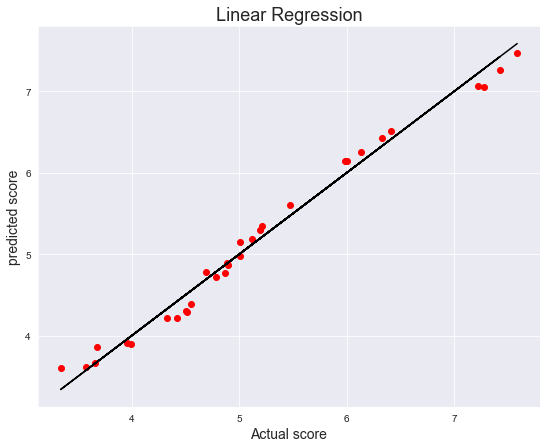

In [494]:
plt.rcParams['figure.figsize']=(9,7)
plt.scatter(x=y_test, y=pred_test, color ='r')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual score', fontsize = 14)
plt.ylabel('predicted score', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.savefig('fittedmodel.png')
plt.show()

## Saving the Model

In [495]:
import pickle #saving the model
filename = 'world_happiness.pkl'
pickle.dump(lr,open(filename, 'wb'))

### Conclusion

In [497]:
load_model = pickle.load(open('world_happiness.pkl','rb'))
result = load_model.score(x_test,y_test)
result*100

98.58682475970032

In [500]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],pred_test[:]],index=['Predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Predicted,7.473564,6.145761,4.871423,4.787525,5.352907,5.60647,6.147224,3.607258,3.899007,7.262378,...,4.293416,4.214375,3.914677,4.391488,4.221785,4.769767,6.42296,5.151898,5.299352,7.058122
original,7.473564,6.145761,4.871423,4.787525,5.352907,5.60647,6.147224,3.607258,3.899007,7.262378,...,4.293416,4.214375,3.914677,4.391488,4.221785,4.769767,6.42296,5.151898,5.299352,7.058122
